In [0]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

### Import Dataset

In [0]:
data=pd.read_csv('CC GENERAL.csv')
data.head()
data =data.drop('CUST_ID', axis=1)
data.fillna(method ='ffill', inplace = True)
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
print(data.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000      

/home/teddy/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Identify number of clusters

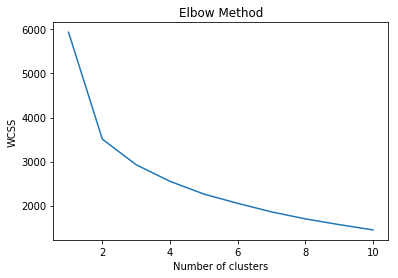

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### In the first line, we create a KMeans object and pass it 2 as value for n_clusters parameter. Next, you simply have to call the fit method on kmeans and pass the data that you want to cluster, which in this case is the X 

In [0]:
kmeans = KMeans(n_clusters=6)
t0 = time.time()
kmeans.fit(data)
t_batch = time.time() - t0
print(t_batch)

0.7823021411895752


##### Printing the different centres K-mean and mini-batch kmeans

In [0]:
print(kmeans.cluster_centers_)


[[0.07123463 0.76418674 0.00615054 0.00631052 0.00199766 0.03866126
  0.18893676 0.11308954 0.06931461 0.18252019 0.04244601 0.00755161
  0.1036663  0.01636148 0.00689805 0.05961226 0.22563054]
 [0.08435635 0.93502731 0.02464451 0.00942438 0.03665719 0.01489151
  0.88495769 0.13196424 0.8352821  0.06435324 0.02003347 0.06618054
  0.13689042 0.03172924 0.01606492 0.056031   0.94531004]
 [0.00776745 0.37421826 0.00726041 0.00605679 0.00486413 0.01028596
  0.20399641 0.07419181 0.12392706 0.02807997 0.00804642 0.00964981
  0.13250918 0.02838965 0.00362039 0.22765128 0.96492049]
 [0.1165241  0.9749368  0.00561543 0.00548472 0.00231095 0.0324745
  0.13217204 0.0798648  0.05270884 0.14388024 0.04299921 0.00726804
  0.14162064 0.03033578 0.01401694 0.02350316 0.97997554]
 [0.10562492 0.97685163 0.05976089 0.05618911 0.02845823 0.0147021
  0.88507032 0.81327008 0.41266054 0.06376285 0.01898633 0.10905979
  0.22005036 0.05917883 0.01029735 0.19413974 0.97134752]
 [0.00992398 0.91864685 0.038088